In [1]:
import numpy
import scipy
from matplotlib import pyplot
from mpl_toolkits.basemap import Basemap
import matplotlib.colors
nicebwr = matplotlib.colors.LinearSegmentedColormap.from_list("nicebwr",["#094da0","#FFFFFF","#ef1a2d"])
import scha
import importlib
import bspline


cos = numpy.cos; sin = numpy.sin

%matplotlib nbagg

In [15]:
knots = numpy.arange(-1050, 2050, 50)
times = numpy.linspace(-1000, 1950, 400)
base = bspline.deboor_base(knots, times, 3)

<IPython.core.display.Javascript object>


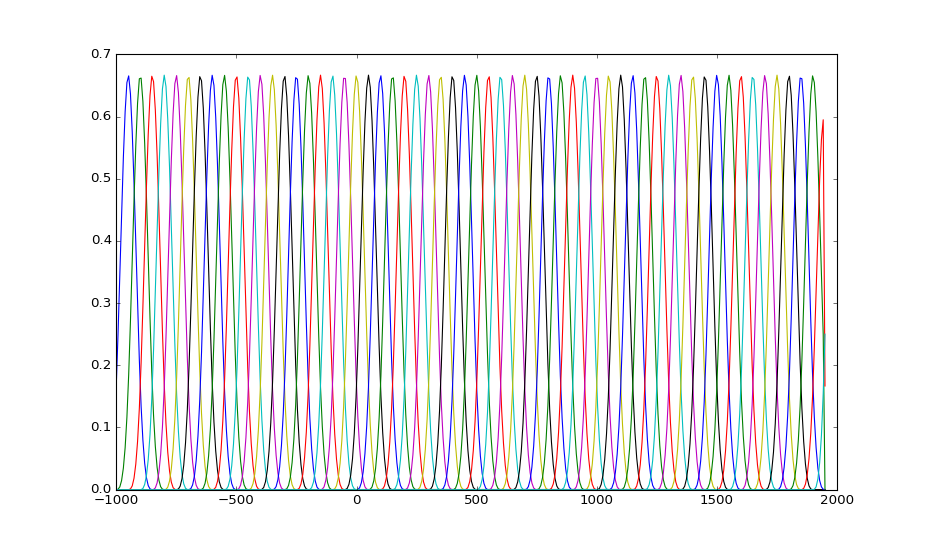

In [16]:
fig, ax = pyplot.subplots()

for b in base.T:
    ax.plot(times, b)
    
pyplot.show(fig)    

In [18]:
base.shape

(400, 62)

In [19]:
numpy.zeros(52)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [30]:
g=numpy.linspace(1, 30, 30)

In [31]:
g=numpy.tile(g, (12,1))

In [32]:
g.shape

(12, 30)

In [39]:
g.flatten()[0::30]

array([ 666.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
          1.,    1.,    1.])

In [40]:
base.shape

(400, 62)